<a href="https://colab.research.google.com/github/KevinASaputra/Machine/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

display(df.info())
display(df.describe(include='all'))

na_count = df.isna().sum().sort_values(ascending=False)
display(na_count[na_count > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


,0
occupation,966
workclass,963
native-country,274


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.impute import SimpleImputer

df_imputed = df.copy()

num_cols = df_imputed.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
cat_cols = df_imputed.select_dtypes(exclude=['object', 'category']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df_imputed[num_cols] = num_imputer.fit_transform(df_imputed[num_cols])
df_imputed[cat_cols] = cat_imputer.fit_transform(df_imputed[cat_cols])

display(df_imputed.isna().sum().sort_values(ascending=False).head(10))

,0
occupation,966
workclass,963
native-country,274
fnlwgt,0
education,0
education-num,0
age,0
marital-status,0
relationship,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df_clean = df_imputed.copy()
bad_tokens = set(['?', ' ?', ' ?', 'unknow', 'unknow', 'NONE', 'none', '-', ''])
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

for c in cat_cols:
  df_clean[c] = df_clean[c].apply(lambda x: 'Others' if str(x).strip() in bad_tokens else x)

for c in cat_cols:
  vc = df_clean[c].value_counts(dropna=False)
  print(f"\n Kolom: {c} | Jumlah Kategory: {vc.shape[0]}")
  display(vc.head(10))

df_ready = df_clean.copy()


 Kolom: workclass | Jumlah Kategory: 10


,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Others,1836
Self-emp-inc,1695
Federal-gov,1432
NaN,963
Without-pay,21



 Kolom: education | Jumlah Kategory: 16


,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955



 Kolom: marital-status | Jumlah Kategory: 7


,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37



 Kolom: occupation | Jumlah Kategory: 16


,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072



 Kolom: relationship | Jumlah Kategory: 6


,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506



 Kolom: race | Jumlah Kategory: 5


,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406



 Kolom: sex | Jumlah Kategory: 2


,count
sex,
Male,32650
Female,16192



 Kolom: native-country | Jumlah Kategory: 43


,count
native-country,
United-States,43832
Mexico,951
Others,583
Philippines,295
NaN,274
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155



 Kolom: income | Jumlah Kategory: 4


,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

In [ ]:
# libray
import matplotlib.pyplot as plt
import seaborn as sns

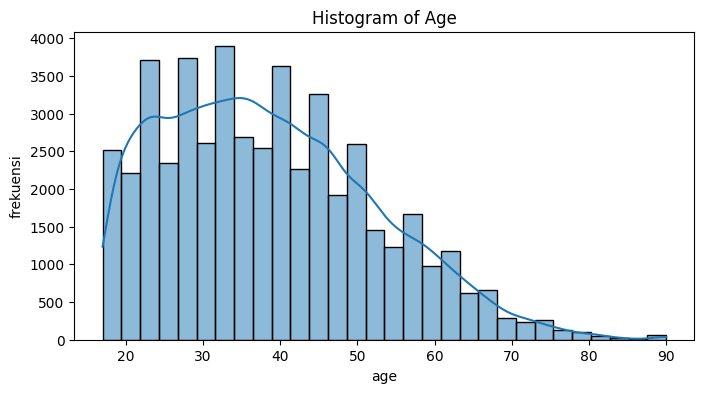

In [ ]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(8,4))
sns.histplot(data=df_ready, x='age', bins=30, kde=True)
plt.title('Histogram of Age')
plt.xlabel("age")
plt.ylabel("frekuensi")
plt.show()

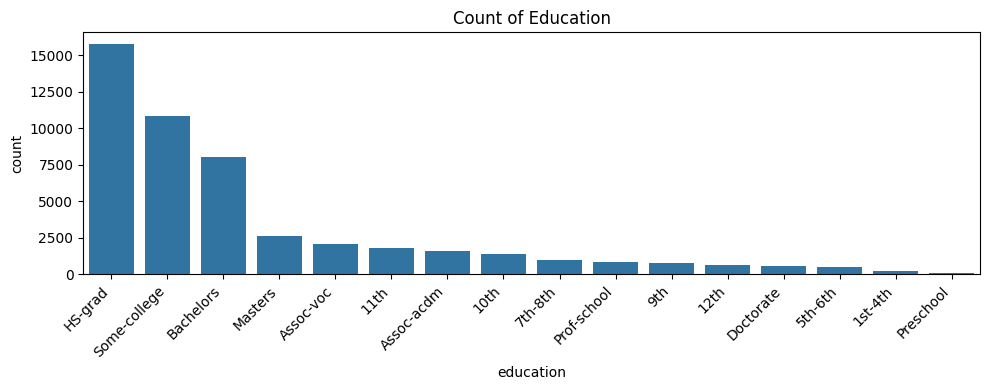

In [ ]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10,4))
order = df_ready['education'].value_counts().index
sns.countplot(data=df_ready, x='education', order=order)
plt.title('Count of Education')
plt.xlabel("education")
plt.ylabel("count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

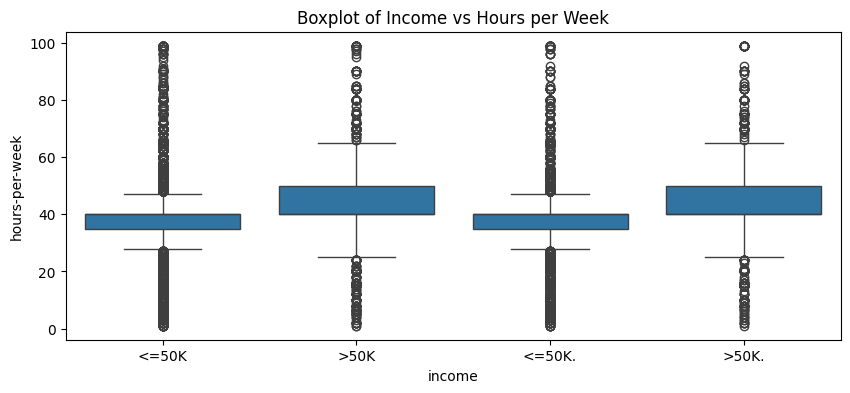

In [30]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10,4))
sns.boxplot(data=df_ready, x='income', y='hours-per-week')
plt.title('Boxplot of Income vs Hours per Week')
plt.xlabel("income")
plt.ylabel("hours-per-week")
plt.show()

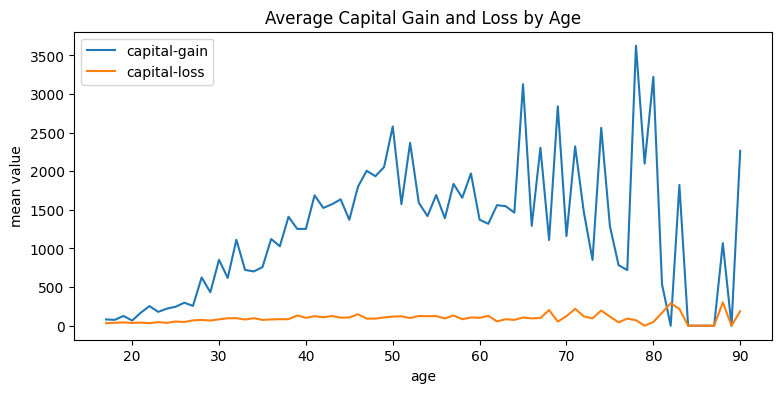

In [31]:
# Jawab 1.4 - Lineplot

agg = df_ready.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()
plt.figure(figsize=(9,4))

sns.lineplot(data=agg, x='age', y='capital-gain', label='capital-gain')
sns.lineplot(data=agg, x='age', y='capital-loss', label='capital-loss')
plt.title('Average Capital Gain and Loss by Age')
plt.xlabel("age")
plt.ylabel("mean value")
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [32]:
# Jawab dengan komentar python

'''
1. fenomena pada distribusi 'age':
- biasanya unimodal dengan puncak pada usia produktif sekitar 30 - 40 an, lalu menurun di usia lebih tua. terdapa ekor kanan ringan.
2. strategi jika terdapat missin age:
- numerik dan sering tidak jauh dari distribusi normal miring kanan, saya pilih imputasi median lebiih robust terhadap outlier dibanding mean
3. outlier hours-per-week per kategori income:
- mengamati boxplot, outlier muncul di kedua kategori, terutama pada jam kerja tinggi >60 h/week
- kategori denga outlier lebih banyak umumnya pada kelompok income yang bekerja extreme jamnya
- detail jumlah outlier dapat di hitung dengan IQR-rule per kategori jika di perlukan
'''

"\n1. fenomena pada distribusi 'age': \n- biasanya unimodal dengan puncak pada usia produktif sekitar 30 - 40 an, lalu menurun di usia lebih tua. terdapa ekor kanan ringan.\n2. strategi jika terdapat missin age: \n"

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [42]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df_enc = df_ready.copy()
df_enc.columns = [c.strip().lower().replace(' ', '-').replace('-', ' ') for c in df_enc.columns]

sex_col_candidates = [c for c in df_enc.columns if c in ('sex', 'gender')]
income_cl_candidates = [c for c in df_enc.columns if c in ('income', 'class', 'target')]

assert sex_col_candidates and income_col_candidates, "kolom 'sex' dan 'income' tidak ditemukan nama colomnya"
sex_col = sex_col_candidates[0]
income_col = income_col_candidates[0]

sex_map = {'male':1, 'female':0, 'male':1, 'female':0}
income_map = {'<=50K':0, '>50K':1, '<=50K':0, '>50K':1, '>50k':1, '<=50k':0}

df_enc[sex_col] = df_enc[sex_col].apply(lambda x: sex_map.get(str(x).strip(), 0))
df_enc[income_col] = df_enc[income_col].apply(lambda x: income_map.get(str(x).strip(), 0))

display(df_enc[[sex_col, income_col]].head())

,sex,income
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

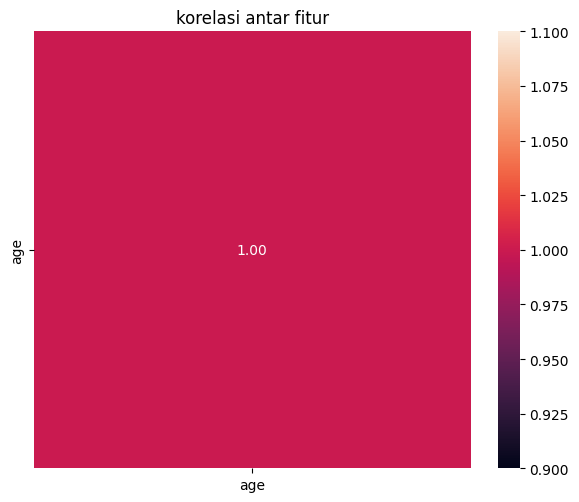

,age
age,1.0


In [46]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
num_cols_focus = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']

cols_in_df = df_enc.columns.tolist()
remap = {}
for c in num_cols_focus:
  c_dash = c.strip().lower().replace(' ', '-')
  for existing in cols_in_df:
    if existing == c or existing == c_dash:
      remap[c] = existing
      break

selected = [remap[k] for k in num_cols_focus if k in remap]
corr = df_enc[selected].corr(numeric_only=True)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title('korelasi antar fitur')
plt.tight_layout()
plt.show()

display(corr)

In [68]:
# Hasil analisis jelaskan pada cell ini
'''
- 'capital-gain' dan 'capital-loss' umumnya berkorelasi lemah dengan 'age' dan 'hours-per-week' (sering sangat sparse).
- 'education-num' bisa punya korelasi moderat dengan 'age' atau 'hours-per-week' tergantung distribusi populasi.
- Secara umum, korelasi linear di Adult dataset cenderung rendah–moderat, sehingga model non-linear bisa relevan.
'''


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [61]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


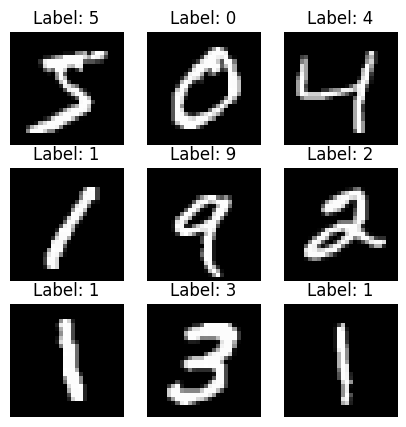

In [67]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

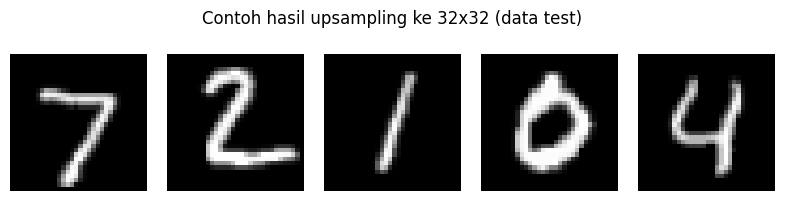

In [71]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

try:
    import tensorflow as tf
except Exception as e:
    raise RuntimeError("TensorFlow diperlukan untuk tf.image.resize pada sel ini. Jalankan di lingkungan dengan TF.")


assert 'X_test' in globals(), "X_test tidak ditemukan. Jalankan sel load MNIST terlebih dahulu."
X_test_resized = tf.image.resize(X_test[..., None], [32, 32], method='bilinear').numpy().squeeze()

plt.figure(figsize=(8,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_resized[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Contoh hasil upsampling ke 32x32 (data test)")
plt.tight_layout()
plt.show()
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [72]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
X_test_norm = X_test_resized / 255.0

print("Sebelum normalisasi:", X_test_resized.min(), "->", X_test_resized.max())
print("Sesudah normalisasi:", X_test_norm.min(), "->", X_test_norm.max())

Sebelum normalisasi: 0.0 -> 255.0
Sesudah normalisasi: 0.0 -> 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [73]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
n = X_test_norm.shape[0]
X_test_flat = X_test_norm.reshape(n, -1)
print("bentuk awal:", X_test_norm.shape, "| Bentuk Setelah Flatten:", X_test_flat.shape)
display(pd.DataFrame(X_test_flat[:3]))

bentuk awal: (10000, 32, 32) | Bentuk Setelah Flatten: (10000, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
